In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
from scipy.integrate import solve_ivp

In [2]:
# importar funciones propias
cwd = os.getcwd()
path = os.path.join(cwd, "source")
sys.path.insert(0, path)
import batch as br

# Apendice (Sesión 03)

<img src="figures/LogoCinvestav.png" style="height:100px" title="Cinvestav">

**CINVESTAV Unidad Saltillo**

**Programa de Maestría en Ciencias en Ingeniería Metalúrgica**

Dr. Edgar Ivan Castro Cedeño


2025

Contacto:
[edgar.castro@cinvestav.mx](mailto:edgar.castro@cinvestav.mx)

## 1.1 Reactores discontinuos

### 1.1.2 Aplicaciones numéricas de la ecuación de diseño

$$\frac{dN_j}{dt} =  r_j V$$

#### 1.1.2.1 Reacción de transformación

Considere la reacción prototipo:

$$\mathrm{aA \longrightarrow cC}$$

Cuyas tasas de reacción relativas se expresan como:

$$\frac{r_{\mathrm{A}}}{-\mathrm{a}} = \frac{r_{\mathrm{C}}}{\mathrm{c}}$$

La trayectoria de la reacción está dada por el siguiente sistema de ecuaciones diferenciales ordinarias:

$$\frac{dN_{\mathrm{A}}}{dt} =  r_{\mathrm{A}} V$$
$$\frac{dN_{\mathrm{C}}}{dt} =  \left(\frac{\mathrm{c}}{-\mathrm{a}}\right) r_{\mathrm{A}} V$$

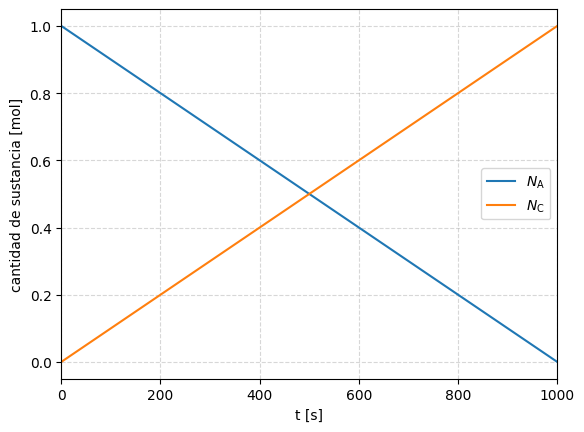

In [13]:
### Reacción de transformación (aA -> cC)
orden = 0
k = 1e-3 # constante de reacción , orden0: [(mol.m-3).s-1], orden1: [s-1], orden2: [(m3.mol-1).s-1]
n0 = np.array([1, 0]) # cantidades iniciales de [A, C], [mol]
s = np.array([1, 1]) # coefs estequiométricos [a, c], [-]
V = 1 # tamaño del reactor, [m3]

t_span = (0, 1000) # rango de tiempo para integración, en [u.a.]
dt = 10 # paso de tiempo, en [u.a.]
t_eval = np.arange(t_span[0], t_span[1]+dt, dt) # array con tiempos en los que se evalua la integración, en [u.a.]

# solución del sistema de ecuaciones diferenciales ordinarias, considerando evento para terminación del cálculo.
sol = solve_ivp(br.batchT, t_span, y0=n0, args=(s, k, V, orden), events=br.Aconsumed, t_eval=t_eval)
t, nA, nC = sol.t, sol.y[0], sol.y[1]

fig, ax = plt.subplots()
ax.plot(t, nA, label=r"$N_{\mathrm{A}}$")
ax.plot(t, nC, label=r"$N_{\mathrm{C}}$")
ax.set(xlim=t_span, xlabel='t [s]', ylabel='cantidad de sustancia [mol]')
ax.grid(ls="--", alpha=0.5)
ax.legend()
plt.show()

#### 1.1.2.2 Reacción de síntesis

Considere la reacción prototipo:

$$\mathrm{aA + bB \longrightarrow cC}$$

Cuyas tasas de reacción relativas se expresan como:

$$\frac{r_{\mathrm{A}}}{-\mathrm{a}} = \frac{r_{\mathrm{B}}}{-\mathrm{b}} = \frac{r_{\mathrm{C}}}{\mathrm{c}}$$

La trayectoria de la reacción está dada por el siguiente sistema de ecuaciones diferenciales ordinarias:

$$\frac{dN_{\mathrm{A}}}{dt} =  r_{\mathrm{A}} V$$
$$\frac{dN_{\mathrm{B}}}{dt} =  \left(\frac{\mathrm{b}}{\mathrm{a}}\right) r_{\mathrm{A}} V$$
$$\frac{dN_{\mathrm{C}}}{dt} =  \left(\frac{\mathrm{c}}{-\mathrm{a}}\right) r_{\mathrm{A}} V$$

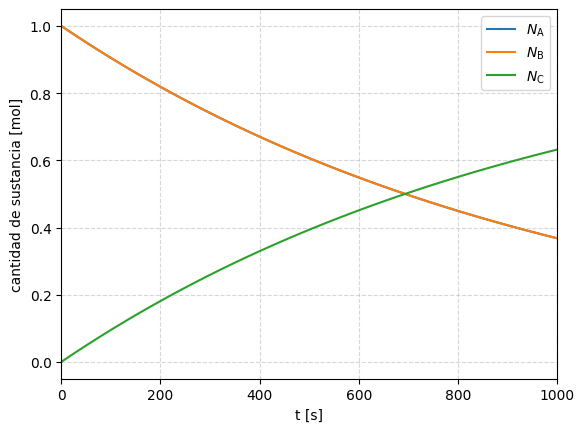

In [15]:
### Reacción de síntesis (aA + bB -> cC)
orden = 1
k = 1e-3 # constante de reacción , orden0: [(mol.m-3).s-1], orden1: [s-1], orden2: [(m3.mol-1).s-1]
n0 = np.array([1, 1, 0]) # cantidades iniciales de [A, B, C], [mol]
s = np.array([1, 1, 1]) # coefs estequiométricos [a, b, c], [-]
V = 1 # tamaño del reactor, [m3]

t_span = (0, 1000) # rango de tiempo para integración, en [u.a.]
dt = 10 # paso de tiempo, en [u.a.]
t_eval = np.arange(t_span[0], t_span[1]+dt, dt) # array con tiempos en los que se evalua la integración, en [u.a.]

# solución del sistema de ecuaciones diferenciales ordinarias, considerando evento para terminación del cálculo.
sol = solve_ivp(br.batchS, t_span, y0=n0, args=(s, k, V, orden), events=br.Aconsumed, t_eval=t_eval)
t, nA, nB, nC = sol.t, sol.y[0], sol.y[1], sol.y[2] 

fig, ax = plt.subplots()
ax.plot(t, nA, label=r"$N_{\mathrm{A}}$")
ax.plot(t, nB, label=r"$N_{\mathrm{B}}$")
ax.plot(t, nC, label=r"$N_{\mathrm{C}}$")
ax.set(xlim=t_span, xlabel='t [s]', ylabel='cantidad de sustancia [mol]')
ax.grid(ls="--", alpha=0.5)
ax.legend()
plt.show()

#### 1.1.2.3 Reacción de descomposición

Considere la reacción prototipo:

$$\mathrm{aA \longrightarrow cC + dD}$$

Cuyas tasas de reacción relativas se expresan como:

$$\frac{r_{\mathrm{A}}}{-\mathrm{a}}  = \frac{r_{\mathrm{C}}}{\mathrm{c}} = \frac{r_{\mathrm{D}}}{\mathrm{d}}$$

La trayectoria de la reacción está dada por el siguiente sistema de ecuaciones diferenciales ordinarias:

$$\frac{dN_{\mathrm{A}}}{dt} =  r_{\mathrm{A}} V$$
$$\frac{dN_{\mathrm{B}}}{dt} =  \left(\frac{\mathrm{b}}{\mathrm{a}}\right) r_{\mathrm{A}} V$$
$$\frac{dN_{\mathrm{C}}}{dt} =  \left(\frac{\mathrm{c}}{-\mathrm{a}}\right) r_{\mathrm{A}} V$$

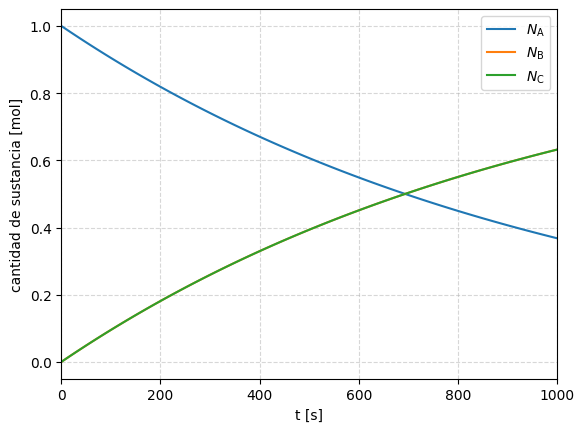

In [17]:
### Reacción de descomposición (aA -> cC + dD)
orden = 1
k = 1e-3 # constante de reacción , orden0: [(mol.m-3).s-1], orden1: [s-1], orden2: [(m3.mol-1).s-1]
n0 = np.array([1, 0, 0]) # cantidades iniciales de [A, B, C], [mol]
s = np.array([1, 1, 1]) # coefs estequiométricos [a, b, c], [-]
V = 1 # tamaño del reactor, [m3]

t_span = (0, 1000) # rango de tiempo para integración, en [u.a.]
dt = 10 # paso de tiempo, en [u.a.]
t_eval = np.arange(t_span[0], t_span[1]+dt, dt) # array con tiempos en los que se evalua la integración, en [u.a.]

# solución del sistema de ecuaciones diferenciales ordinarias, considerando evento para terminación del cálculo.
sol = solve_ivp(br.batchD, t_span, y0=n0, args=(s, k, V, orden), events=br.Aconsumed, t_eval=t_eval)
t, nA, nB, nC = sol.t, sol.y[0], sol.y[1], sol.y[2] 

fig, ax = plt.subplots()
ax.plot(t, nA, label=r"$N_{\mathrm{A}}$")
ax.plot(t, nB, label=r"$N_{\mathrm{B}}$")
ax.plot(t, nC, label=r"$N_{\mathrm{C}}$")
ax.set(xlim=t_span, xlabel='t [s]', ylabel='cantidad de sustancia [mol]')
ax.grid(ls="--", alpha=0.5)
ax.legend()
plt.show()

#### 1.1.2.4 Reacción general

Considere la reacción prototipo:

$$\mathrm{aA + bB \longrightarrow cC + dD}$$

Cuyas tasas de reacción relativas se expresan como:

$$\frac{r_{\mathrm{A}}}{-\mathrm{a}} = \frac{r_{\mathrm{B}}}{-\mathrm{b}} = \frac{r_{\mathrm{C}}}{\mathrm{c}} = \frac{r_{\mathrm{D}}}{\mathrm{d}}$$

La trayectoria de la reacción está dada por el siguiente sistema de ecuaciones diferenciales ordinarias:

$$\frac{dN_{\mathrm{A}}}{dt} =  r_{\mathrm{A}} V$$
$$\frac{dN_{\mathrm{B}}}{dt} =  \left(\frac{\mathrm{b}}{\mathrm{a}}\right) r_{\mathrm{A}} V$$
$$\frac{dN_{\mathrm{C}}}{dt} =  \left(\frac{\mathrm{c}}{-\mathrm{a}}\right) r_{\mathrm{A}} V$$
$$\frac{dN_{\mathrm{D}}}{dt} =  \left(\frac{\mathrm{d}}{-\mathrm{a}}\right) r_{\mathrm{A}} V$$

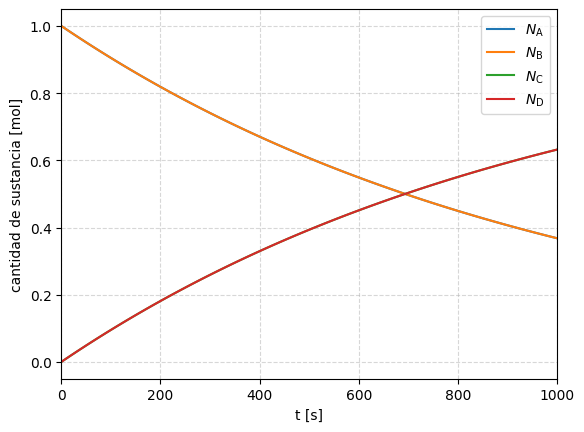

In [19]:
### Reacción orden 0 (aA + bB -> cC + dD)
orden = 1
k0 = 1e-3 # constante de reacción orden cero, [(mol.m-3).s-1]
n0 = np.array([1, 1, 0, 0]) # cantidades iniciales de [A, B, C, D], [mol]
s = np.array([1, 1, 1, 1]) # coefs estequiométricos [a, b, c, d], [-]
V = 1 # tamaño del reactor, [m3]

t_span = (0, 1000) # rango de tiempo para integración, en [u.a.]
dt = 10 # paso de tiempo, en [u.a.]
t_eval = np.arange(t_span[0], t_span[1]+dt, dt) # array con tiempos en los que se evalua la integración, en [u.a.]

# solución del sistema de ecuaciones diferenciales ordinarias, considerando evento para terminación del cálculo.
sol0 = solve_ivp(br.batchG, t_span, y0=n0, args=(s, k0, V, orden), events=br.Aconsumed, t_eval=t_eval)
t, nA, nB, nC, nD = sol0.t, sol0.y[0], sol0.y[1], sol0.y[2], sol0.y[3]

fig, ax = plt.subplots()
ax.plot(t, nA, label=r"$N_{\mathrm{A}}$")
ax.plot(t, nB, label=r"$N_{\mathrm{B}}$")
ax.plot(t, nC, label=r"$N_{\mathrm{C}}$")
ax.plot(t, nD, label=r"$N_{\mathrm{D}}$")
ax.set(xlim=t_span, xlabel='t [s]', ylabel='cantidad de sustancia [mol]')
ax.grid(ls="--", alpha=0.5)
ax.legend()
plt.show()

### 1.1.3 Aplicaciones numéricas en término de la conversión

$$N_{\mathrm{A}_0} \frac{d X}{dt} = -r_{\mathrm{A}} V$$

#### 1.1.3.1 Reacción de transformación

Considere la reacción prototipo:

$$\mathrm{aA \longrightarrow cC}$$

Cuyas tasas de reacción relativas se expresan como:

$$\frac{r_{\mathrm{A}}}{-\mathrm{a}} = \frac{r_{\mathrm{C}}}{\mathrm{c}}$$

La trayectoria de la reacción está dada por el siguiente sistema de ecuaciones diferenciales ordinarias:

$$\frac{dN_{\mathrm{A}}}{dt} =  r_{\mathrm{A}} V$$
$$\frac{dN_{\mathrm{C}}}{dt} =  \left(\frac{\mathrm{c}}{-\mathrm{a}}\right) r_{\mathrm{A}} V$$

In [7]:
def rateT(k, cA, order=1):
    """
    Ley de velocidad de reacción, aA -> cC (orden 0, 1 y 2)

    Parametros:
        k: constante de reacción, [(mol.m-3).s-1], [s-1], [(m3.mol-1).s-1]
        cA: concentración del reactivo limitante, [mol.m-3]
        order: orden de la reacción: 0, 1, 2
    """
    if order==0: return k           # k, [(mol.m-3).s-1]
    elif order==1: return k*cA      # k, [s-1]
    elif order==2: return k*(cA)**2 # k, [(m3.mol-1).s-1]
    else: raise NotImplementedError("only implemented orders are: 0, 1, 2")


def batch_reactorT(t, n, s, k, V, order=1):
    """
    Sistema de ecuaciones reactor batch, aA -> cC
    
    Parametros:
        t: tiempo, [s]
        n: cantidad de especie [nA, nC], [mol]
        s: coefs. estequiométricos [a, c], [-]
        k: constante de reacción, [(mol.m-3).s-1], [s-1], [(m3.mol-1).s-1]
        V: volumen del reactor, [m3]
        order: orden de la reacción: 0, 1, 2
    """
    nA, nC = n
    a, c = s
    cA, cC = nA/V, nC/V
    rA = -1*rateT(k, cA, order)
    dNA_dt, dNC_dt = rA*V, -(c/a)*rA*V
    return np.array([dNA_dt, dNC_dt])


# Terminar el cálculo si el reactivo A es consumido completamente
def Aconsumed(t, n, s, k, V, order=1): return n[0] 
Aconsumed.terminal = True

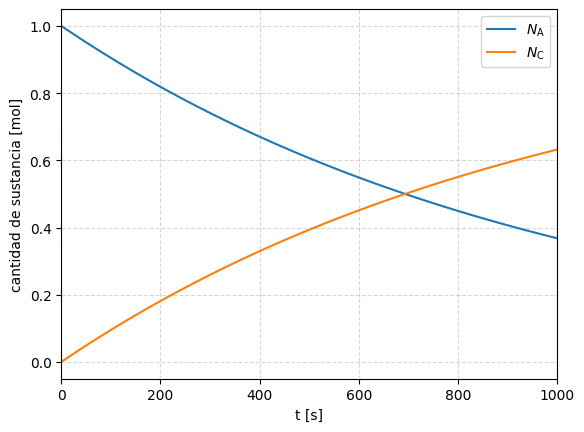

In [8]:
### Reacción de transformación (aA -> cC)
orden = 1
k = 1e-3 # constante de reacción , orden0: [(mol.m-3).s-1], orden1: [s-1], orden2: [(m3.mol-1).s-1]
n0 = np.array([1, 0]) # cantidades iniciales de [A, C], [mol]
s = np.array([1, 1]) # coefs estequiométricos [a, c], [-]
V = 1 # tamaño del reactor, [m3]

t_span = (0, 1000) # rango de tiempo para integración, en [u.a.]
dt = 10 # paso de tiempo, en [u.a.]
t_eval = np.arange(t_span[0], t_span[1]+dt, dt) # array con tiempos en los que se evalua la integración, en [u.a.]

# solución del sistema de ecuaciones diferenciales ordinarias, considerando evento para terminación del cálculo.
sol = solve_ivp(batch_reactorT, t_span, y0=n0, args=(s, k, V, orden), events=Aconsumed, t_eval=t_eval)
t, nA, nC = sol.t, sol.y[0], sol.y[1]

fig, ax = plt.subplots()
ax.plot(t, nA, label=r"$N_{\mathrm{A}}$")
ax.plot(t, nC, label=r"$N_{\mathrm{C}}$")
ax.set(xlim=t_span, xlabel='t [s]', ylabel='cantidad de sustancia [mol]')
ax.grid(ls="--", alpha=0.5)
ax.legend()
plt.show()

#### 1.1.3.2 Reacción de síntesis

Considere la reacción prototipo:

$$\mathrm{aA + bB \longrightarrow cC}$$

Cuyas tasas de reacción relativas se expresan como:

$$\frac{r_{\mathrm{A}}}{-\mathrm{a}} = \frac{r_{\mathrm{B}}}{-\mathrm{b}} = \frac{r_{\mathrm{C}}}{\mathrm{c}}$$

La trayectoria de la reacción está dada por el siguiente sistema de ecuaciones diferenciales ordinarias:

$$\frac{dN_{\mathrm{A}}}{dt} =  r_{\mathrm{A}} V$$
$$\frac{dN_{\mathrm{B}}}{dt} =  \left(\frac{\mathrm{b}}{\mathrm{a}}\right) r_{\mathrm{A}} V$$
$$\frac{dN_{\mathrm{C}}}{dt} =  \left(\frac{\mathrm{c}}{-\mathrm{a}}\right) r_{\mathrm{A}} V$$

#### 1.1.3.3 Reacción de descomposición

Considere la reacción prototipo:

$$\mathrm{aA \longrightarrow cC + dD}$$

Cuyas tasas de reacción relativas se expresan como:

$$\frac{r_{\mathrm{A}}}{-\mathrm{a}}  = \frac{r_{\mathrm{C}}}{\mathrm{c}} = \frac{r_{\mathrm{D}}}{\mathrm{d}}$$

La trayectoria de la reacción está dada por el siguiente sistema de ecuaciones diferenciales ordinarias:

$$\frac{dN_{\mathrm{A}}}{dt} =  r_{\mathrm{A}} V$$
$$\frac{dN_{\mathrm{B}}}{dt} =  \left(\frac{\mathrm{b}}{\mathrm{a}}\right) r_{\mathrm{A}} V$$
$$\frac{dN_{\mathrm{C}}}{dt} =  \left(\frac{\mathrm{c}}{-\mathrm{a}}\right) r_{\mathrm{A}} V$$

#### 1.1.3.4 Reacción general

Considere la reacción prototipo:

$$\mathrm{aA + bB \longrightarrow cC + dD}$$

Cuyas tasas de reacción relativas se expresan como:

$$\frac{r_{\mathrm{A}}}{-\mathrm{a}} = \frac{r_{\mathrm{B}}}{-\mathrm{b}} = \frac{r_{\mathrm{C}}}{\mathrm{c}} = \frac{r_{\mathrm{D}}}{\mathrm{d}}$$

La trayectoria de la reacción está dada por el siguiente sistema de ecuaciones diferenciales ordinarias:

$$\frac{dN_{\mathrm{A}}}{dt} =  r_{\mathrm{A}} V$$
$$\frac{dN_{\mathrm{B}}}{dt} =  \left(\frac{\mathrm{b}}{\mathrm{a}}\right) r_{\mathrm{A}} V$$
$$\frac{dN_{\mathrm{C}}}{dt} =  \left(\frac{\mathrm{c}}{-\mathrm{a}}\right) r_{\mathrm{A}} V$$
$$\frac{dN_{\mathrm{D}}}{dt} =  \left(\frac{\mathrm{d}}{-\mathrm{a}}\right) r_{\mathrm{A}} V$$

## 1.2 Reactor Agitado de Flujo Continuo (CSTR)

#### 3.1.2.3 Ejemplo de aplicación numérica

Considere la reacción prototipo:

$$\mathrm{A \longrightarrow B}$$

Con una ley de velocidad de reacción de orden uno:

$$r_{A} = -k C_{\mathrm{A}}$$

La trayectoria de la reacción está dada por la ecuación algebraica:

$$V = \frac{\dot{Q} (C_{\mathrm{A_0}} - C_{\mathrm{A}})}{-r_{\mathrm{A}}}$$

In [9]:
def cstr(Q, r, c0, c):
    return (Q*(c0-c))/(-r)

In [10]:
# parámetros de entrada para solución la ecuación algebraica
k = 1e0 # constante de reacción orden uno, en [s.^-1]
c0, c = 1, 0.01
rA = -k*c

Q = np.linspace(0, 10, 21) # m3/s
V = np.zeros_like(Q)

for i, q in enumerate(Q):
    V[i] = cstr(q, rA, c0, c)

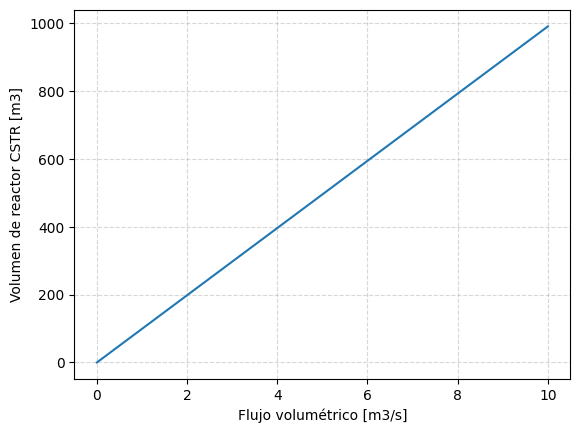

In [11]:
fig, ax = plt.subplots()
ax.plot(Q, V)
ax.set(xlabel='Flujo volumétrico [m3/s]', ylabel='Volumen de reactor CSTR [m3]')
ax.grid(ls="--", alpha=0.5)
plt.show()

### 3.1.3 Reactor de flujo pistón (PFR)

#### 3.1.3.3 Ejemplo de aplicación numérica

Considere la reacción prototipo:

$$\mathrm{A \longrightarrow B}$$

Con una ley de velocidad de reacción de orden uno:

$$r_{A} = -k C_{\mathrm{A}}$$

La trayectoria de la reacción está dada por la ecuación diferencial:

$$\frac{dF_{j}}{dV} = r_j$$

In [12]:
def pfr(V, F, r):
    fA, fB = F
    r = 
    return 

SyntaxError: invalid syntax (3010892162.py, line 3)

In [ ]:
# parámetros de entrada para solución la ecuación algebraica
k = 1e0 # constante de reacción orden uno, en [s.^-1]
c0, c = 1, 0.01
rA = -k*c

Q = np.linspace(0, 10, 21) # m3/s
V = np.zeros_like(Q)

for i, q in enumerate(Q):
    V[i] = cstr(q, rA, c0, c)

In [ ]:
fig, ax = plt.subplots()
ax.plot(Q, V)
ax.set(xlabel='Flujo volumétrico [m3/s]', ylabel='Volumen de reactor CSTR [m3]')
ax.grid(ls="--", alpha=0.5)
plt.show()